# Exploration of the data

In [97]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Loading the train and test data
X_train = np.load('../data/X_train.npy')
X_test = np.load('../data/X_test.npy')

y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

In [7]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (16841, 1, 128, 128)
Shape of y_train: (16841,)

Shape of X_test: (8420, 1, 128, 128)
Shape of y_test: (8420,)


From the code above we can see that the train:test data is split into ratio 2:1 (16841 samples in train and 8420 in sample in test).

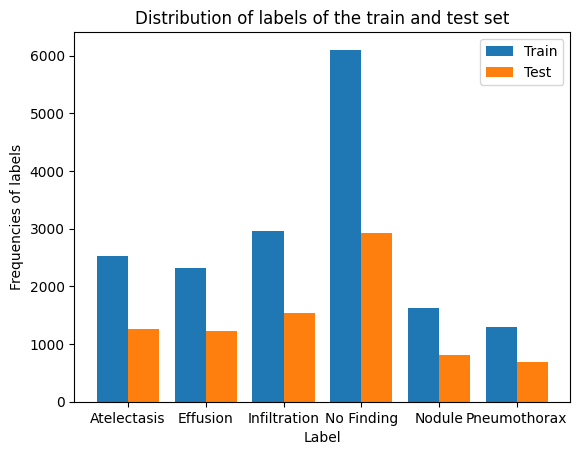

In [26]:
labels = ['Atelectasis', 'Effusion', 'Infiltration', 'No Finding', 'Nodule', 'Pneumothorax']

# get the labels and the frequency of each label in the train, test data
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

X_axis = np.arange(len(unique_train))

plt.bar(X_axis - 0.2, counts_train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, counts_test, 0.4, label = 'Test')

plt.xticks(X_axis, labels)
plt.xlabel("Label")
plt.ylabel("Frequencies of labels")
plt.title("Distribution of labels of the train and test set")
plt.legend()
plt.show()

In [54]:
print("Train data:")
for l, f in zip(labels, counts_train):
    print(f"Label: {l} - Frequency: {f}")

print("")
print("Test data:")
for l, f in zip(labels, counts_test):
    print(f"Label: {l} - Frequency: {f}")


Train data:
Label: Atelectasis - Frequency: 2521
Label: Effusion - Frequency: 2318
Label: Infiltration - Frequency: 2964
Label: No Finding - Frequency: 6103
Label: Nodule - Frequency: 1633
Label: Pneumothorax - Frequency: 1302

Test data:
Label: Atelectasis - Frequency: 1254
Label: Effusion - Frequency: 1218
Label: Infiltration - Frequency: 1537
Label: No Finding - Frequency: 2924
Label: Nodule - Frequency: 806
Label: Pneumothorax - Frequency: 681


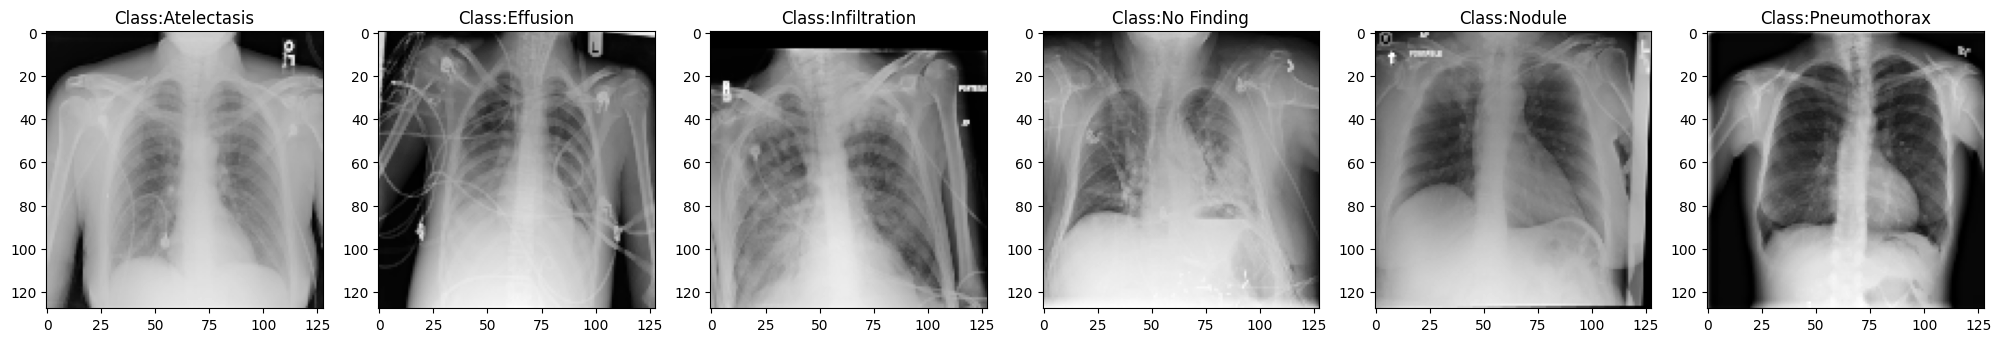

In [27]:
unique_labels = np.arange(len(unique_train))
fig, ax = plt.subplots(ncols=len(unique_labels), figsize=[25,5])

for k, label in enumerate(unique_labels):
  index = list(y_test).index(label)
  ax[k].imshow(X_test[index].reshape(128,128), cmap='gray')
  ax[k].set_title(f'Class:{labels[y_test[index]]}')

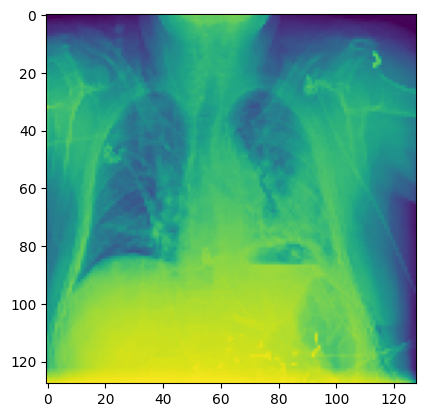

In [30]:
plt.imshow(X_test[0].reshape(128,128))

In [8]:
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt


In [6]:
loader = DataLoader(x[0], batch_size=1000, num_workers=1)
num_of_pixels = len(x[0]) * 128 * 128

total_sum = 0
for batch in loader: total_sum += batch[0].sum()
meann = total_sum/ num_of_pixels
sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0] - meann).pow(2)).sum()
stdd = torch.sqrt(sum_of_squared_error / num_of_pixels)

AttributeError: Caught AttributeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\dimit\Data_Science\Courses\Year_2\Q3\Data_Challenge_1\Main\DC1_group14\.venv\lib\site-packages\torch\utils\data\_utils\worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "c:\Users\dimit\Data_Science\Courses\Year_2\Q3\Data_Challenge_1\Main\DC1_group14\.venv\lib\site-packages\torch\utils\data\_utils\fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "c:\Users\dimit\Data_Science\Courses\Year_2\Q3\Data_Challenge_1\Main\DC1_group14\.venv\lib\site-packages\torch\utils\data\_utils\collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "c:\Users\dimit\Data_Science\Courses\Year_2\Q3\Data_Challenge_1\Main\DC1_group14\.venv\lib\site-packages\torch\utils\data\_utils\collate.py", line 120, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "c:\Users\dimit\Data_Science\Courses\Year_2\Q3\Data_Challenge_1\Main\DC1_group14\.venv\lib\site-packages\torch\utils\data\_utils\collate.py", line 160, in collate_tensor_fn
    numel = sum(x.numel() for x in batch)
  File "c:\Users\dimit\Data_Science\Courses\Year_2\Q3\Data_Challenge_1\Main\DC1_group14\.venv\lib\site-packages\torch\utils\data\_utils\collate.py", line 160, in <genexpr>
    numel = sum(x.numel() for x in batch)
AttributeError: 'numpy.int32' object has no attribute 'numel'


In [8]:
meann

tensor(0.1265)

In [9]:
stdd

tensor(4.4669)

In [10]:
norm = transforms.Normalize((meann), (stdd))

In [14]:
X_tensor = X_train.torch.from_numpy(self.imgs[idx] / 255).float()


(16841, 1, 128, 128)

In [85]:
import numpy as np
import torch
import requests
import io
from os import path
from typing import Tuple
from pathlib import Path
import os
import torchvision.transforms.functional as TF
import torchvision.transforms as T
import torch.nn.functional as F
import kornia

class ImageDataset:
    """
    Creates a DataSet from numpy arrays while keeping the data
    in the more efficient numpy arrays for as long as possible and only
    converting to torchtensors when needed (torch tensors are the objects used
    to pass the data through the neural network and apply weights).
    """

    def __init__(self, x: Path, y: Path) -> None:
        # Target labels
        self.targets = ImageDataset.load_numpy_arr_from_npy(y)
        # Images
        self.imgs = ImageDataset.load_numpy_arr_from_npy(x)

    def __len__(self) -> int:
        return len(self.targets)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, np.ndarray]:
        image = torch.from_numpy(self.imgs[idx] / 255).float()

        # normalized the data
        mean = image.mean()
        std = image.std()
        normalize = T.Normalize(mean, std, inplace=False)
        norm_image = normalize(image)

        sharpened_img_tensor = kornia.filters.unsharp_mask(norm_image, kernel_size=3, sigma=1.0)

        # sharpening the data
        # img_sharp = TF.adjust_sharpness(norm_image, sharpness_factor=1)

        # transform = transforms.Compose([transforms.ToPILImage(), transforms.Grayscale(num_output_channels=3), transforms.ToTensor()])
        label = self.targets[idx]
        # image = transform(image)
        return sharpened_img_tensor, label

    @staticmethod
    def load_numpy_arr_from_npy(path: Path) -> np.ndarray:
        """
        Loads a numpy array from local storage.

        Input:
        path: local path of file

        Outputs:
        dataset: numpy array with input features or labels
        """

        return np.load(path)

In [86]:
x = ImageDataset(Path("../data/X_train.npy"), Path("../data/Y_train.npy"))


In [5]:
for images, target in x:
    print(images.shape, target)
    break

torch.Size([1, 128, 128]) 3


In [6]:
rgb_tensor = torch.stack([x[0][0][0]]*3, dim=0)

In [72]:
plt.imshow(x[0].reshape(128,128))

NameError: name 'img_tensor' is not defined

In [87]:
x[1][0]

TypeError: Not a Tensor type. Got: <class 'float'>.
None

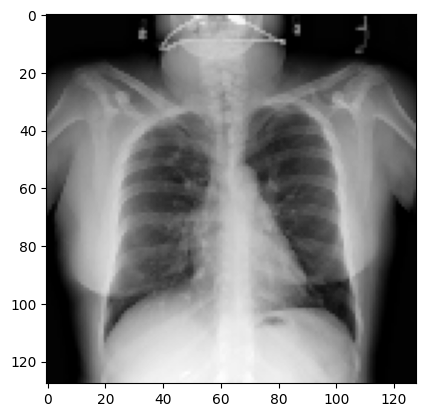

In [66]:
plt.imshow(x[1][0].reshape(128,128), cmap='gray')

In [24]:
x[1][0][0].shape

torch.Size([128, 128])

In [31]:
x[0][0].shape

torch.Size([3, 128, 128])

In [8]:
image = torch.from_numpy(X_train / 255).float()
image

tensor([[[[0.0275, 0.0235, 0.0235,  ..., 0.0118, 0.0196, 0.0196],
          [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0157, 0.0196],
          [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0157, 0.0196],
          ...,
          [0.5725, 0.6549, 0.6824,  ..., 0.7843, 0.5765, 0.5059],
          [0.6039, 0.6549, 0.6824,  ..., 0.7490, 0.6157, 0.4667],
          [0.6314, 0.6706, 0.6941,  ..., 0.7804, 0.6706, 0.4314]]],


        [[[0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          [0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
          ...,
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078]]],


        [[[0.3294, 0.1961, 0.1647,  ..., 0.1765, 0.1804, 0.2157],
          [0.3216, 0.1843, 0.1608,  ..., 0.1608, 0.1647, 0.1961],
          [0.3098, 0.1804, 0.1608,  ..

In [9]:

loader = DataLoader(image, batch_size=1000, num_workers=1)
num_of_pixels = len(image) * 128 * 128

total_sum = 0
for batch in loader: total_sum += batch[0].sum()
meann = total_sum/ num_of_pixels
sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0] - meann).pow(2)).sum()
stdd = torch.sqrt(sum_of_squared_error / num_of_pixels)

In [10]:
meann

tensor(0.0005)

In [11]:
stdd

tensor(0.0175)

In [12]:
norm = transforms.Normalize(0.4323, 0.2504)

In [13]:
image_normalized = norm(image)

In [34]:
lo = DataLoader(image, batch_size = len(image), num_workers=1)
data = next(iter(lo))
data[0].mean(), data[0].std()

(tensor(0.4323), tensor(0.2504))

In [14]:
lo = DataLoader(image_normalized, batch_size = len(image_normalized), num_workers=2)
data = next(iter(lo))
data[0].mean(), data[0].std()

(tensor(0.0435), tensor(0.5569))

In [ ]:
lo = DataLoader(image, batch_size = len(image), num_workers=1)
data = next(iter(lo))
data[0].mean(), data[0].std()

In [39]:
loader = DataLoader(image, batch_size=1000, num_workers=1)
num_of_pixels = len(image) * 128 * 128

total_sum = 0
for batch in loader: total_sum += batch[0].sum()
meann = total_sum/ num_of_pixels
sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0] - meann).pow(2)).sum()
stdd = torch.sqrt(sum_of_squared_error / num_of_pixels)
meann, stdd

(tensor(0.0005), tensor(0.0175))

In [111]:
import numpy as np
import torch
import requests
import io
from os import path
from typing import Tuple
from pathlib import Path
import os
import torchvision
import torchvision.transforms as transforms


class ImageDataset:
    """
    Creates a DataSet from numpy arrays while keeping the data
    in the more efficient numpy arrays for as long as possible and only
    converting to torchtensors when needed (torch tensors are the objects used
    to pass the data through the neural network and apply weights).
    """

    def __init__(self, x: Path, y: Path) -> None:
        # Target labels
        self.targets = ImageDataset.load_numpy_arr_from_npy(y)
        # Images
        self.imgs = ImageDataset.load_numpy_arr_from_npy(x)

    def __len__(self) -> int:
        return len(self.targets)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, np.ndarray]:
        image = torch.from_numpy(self.imgs[idx] / 255).float()
        transform = transforms.Compose([transforms.ToPILImage(), transforms.Grayscale(num_output_channels=3), transforms.ToTensor()])
        label = self.targets[idx]
        image = transform(image)
        return image, label

    @staticmethod
    def load_numpy_arr_from_npy(path: Path) -> np.ndarray:
        """
        Loads a numpy array from local storage.

        Input:
        path: local path of file

        Outputs:
        dataset: numpy array with input features or labels
        """
        
        return np.load(path)


def load_numpy_arr_from_url(url: str) -> np.ndarray:
    """
    Loads a numpy array from surfdrive.

    Input:
    url: Download link of dataset

    Outputs:
    dataset: numpy array with input features or labels
    """

    response = requests.get(url)
    response.raise_for_status()

    return np.load(io.BytesIO(response.content))




In [11]:
X_image_train = ImageDataset(Path("../data/X_train.npy"), Path("../data/Y_train.npy"))
X_image_test = ImageDataset(Path("../data/X_test.npy"), Path("../data/Y_test.npy"))


In [17]:
X_image_train[0]


NameError: name 'm' is not defined

In [38]:
dataset = np.concatenate((X_train, X_test))
dataset_tensor = torch.from_numpy(dataset)

In [11]:
image_train= torch.from_numpy(X_train / 255).float()
lo = DataLoader(image_train, batch_size = len(image_train), num_workers=1)
data_train = next(iter(lo))
data_train[0].mean(), data_train[0].std()

(tensor(0.4323), tensor(0.2504))

In [14]:
image_test = torch.from_numpy(X_test/ 255).float()
lo = DataLoader(image_test, batch_size = len(image_test), num_workers=1)
data_test = next(iter(lo))
data_test[0].mean(), data_test[0].std()

(tensor(0.5422), tensor(0.1932))

In [29]:
s = torch.from_numpy(X_image_train.imgs)/255
s.std()

tensor(0.2462)

In [90]:
from tqdm import tqdm
import torch
from typing import Callable, List
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np


def test_model(
        model,
        test_sampler,
        loss_function: Callable[..., torch.Tensor],
        device: str,
) -> List[torch.Tensor]:
    # Setting the model to evaluation mode:
    model.eval()
    losses = []

    predicted_labels = []
    true_labels = []
    # We need to make sure we do not update our model based on the test data:
    with torch.no_grad():
        correct = 0
        count = 0
        for (x, y) in tqdm(test_sampler):
            # Making sure our samples are stored on the same device as our model:
            x = x.to(device)
            y = y.to(device)
            prediction = model.forward(x)
            loss = loss_function(prediction, y)
            losses.append(loss)
            prediction1 = model.forward(x).argmax(axis=1)
            correct += sum(prediction1 == y)
            count += len(y)

            predicted_labels.extend(prediction1.detach().cpu().numpy())
            true_labels.extend(y.detach().cpu().numpy())
        accuracy = (correct/count).detach().cpu().numpy()

    predicted_labels = np.array(predicted_labels)
    true_labels = np.array(true_labels)
    confusion_mat = confusion_matrix(true_labels, predicted_labels)
    class_report = classification_report(true_labels, predicted_labels)
    return losses, accuracy, confusion_mat, class_report

In [94]:
import numpy as np
import random
import torch
from typing import Generator, Tuple


class BatchSampler:
    """
    Implements an iterable which given a torch dataset and a batch_size
    will produce batches of data of that given size. The batches are
    returned as tuples in the form (images, labels).
    Can produce balanced batches, where each batch will have an equal
    amount of samples from each class in the dataset. If your dataset is heavily

    imbalanced, this might mean throwing away a lot of samples from
    over-represented classes!
    """

    def __init__(self, batch_size: int, dataset, balanced: bool = False) -> None:
        self.batch_size = batch_size
        self.dataset = dataset
        self.balanced = balanced
        if self.balanced:
            # Counting the ocurrence of the class labels:
            unique, counts = np.unique(self.dataset.targets, return_counts=True)
            indexes = []
            # Sampling an equal amount from each class:
            for i in range(len(unique)):
                indexes.append(
                    np.random.choice(
                        np.where(self.dataset.targets == i)[0],
                        size=counts.min(),
                        replace=False,
                    )
                )
            # Setting the indexes we will sample from later:
            self.indexes = np.concatenate(indexes)
        else:
            # Setting the indexes we will sample from later (all indexes):
            self.indexes = [i for i in range(len(dataset))]

    def __len__(self) -> int:
        return (len(self.indexes) // self.batch_size) + 1

    def shuffle(self) -> None:
        random.shuffle(self.indexes)

    def __iter__(self) -> Generator[Tuple[torch.Tensor, torch.Tensor], None, None]:
        remaining = False
        self.shuffle()
        # Go over the datset in steps of 'self.batch_size':
        for i in range(0, len(self.indexes), self.batch_size):
            # If our current batch is larger than the remaining data, we quit:
            if i + self.batch_size > len(self.indexes):
                remaining = True
                break
            # If not, we yield a complete batch:
            else:
                # Getting a list of samples from the dataset, given the indexes we defined:
                X_batch = [
                    self.dataset[self.indexes[k]][0]
                    for k in range(i, i + self.batch_size)
                ]
                Y_batch = [
                    self.dataset[self.indexes[k]][1]
                    for k in range(i, i + self.batch_size)
                ]
                # Stacking all the samples and returning the target labels as a tensor:
                yield torch.stack(X_batch).float(), torch.tensor(Y_batch).long()
        # If there is still data left that was not a full batch:
        if remaining:
            # Return the last batch (smaller than batch_size):
            X_batch = [
                self.dataset[self.indexes[k]][0] for k in range(i, len(self.indexes))
            ]
            Y_batch = [
                self.dataset[self.indexes[k]][1] for k in range(i, len(self.indexes))
            ]
            yield torch.stack(X_batch).float(), torch.tensor(Y_batch).long()


In [103]:
import torch
import torch.nn as nn
import torchvision

class Net(nn.Module):
    def __init__(self, n_classes: int) -> None:
        super(Net, self).__init__()

        # self.conv1 = nn.Conv2d(1, 1, kernel_size=7, stride=2, padding=3, bias=False)
        # Defining a 2D convolution layer
        # self.densenet121 = torchvision.models.densenet121(pretrained=True)
        # num_ftrs = self.densenet121.classifier.in_features
        # self.densenet121.classifier = nn.Sequential(
		    # nn.Linear(num_ftrs, n_classes))

        # self.linear_layers = nn.Sequential(
        #     nn.Linear(1152, 256),
        #     nn.ReLU(inplace=True),
        #     nn.Linear(256, n_classes)
        # )
        self.resnet = torchvision.models.resnet50(pretrained=True)
        self.densenet = torchvision.models.densenet121(pretrained=True)
        self.num_resnet_features = self.resnet.fc.in_features
        self.num_densenet_features = self.densenet.classifier.in_features
        self.resnet.fc = nn.Identity()
        self.densenet.classifier = nn.Identity()
        self.fc = nn.Linear(self.num_resnet_features + self.num_densenet_features, n_classes)

    # Defining the forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x = self.conv1(x)
        # x = self.densenet121(x)
        # After our convolutional layers which are 2D, we need to flatten our
        # input to be 1 dimensional, as the linear layers require this.
        # x = x.view(x.size(0), -1)
        # x = self.linear_layers(x)
        resnet_output = self.resnet(x)
        densenet_output = self.densenet(x)
        combined_output = torch.cat((resnet_output, densenet_output), dim=1)
        output = self.fc(combined_output)
        return output

In [98]:
test_dataset = ImageDataset(Path("../data/X_test.npy"), Path("../data/Y_test.npy"))

In [109]:
model = Net(n_classes=6)
model.load_state_dict(torch.load('../model_weights/model_03_29_23_17.txt'))

<All keys matched successfully>

In [99]:
test_sampler = BatchSampler(
        batch_size=100, dataset=test_dataset, balanced=True
    )

In [101]:
import torch.nn as nn
loss_function = nn.CrossEntropyLoss()

In [112]:
losses, accuracy, confusion_mat, class_report = test_model(model, test_sampler, loss_function, 'cuda')

  0%|          | 0/41 [00:00<?, ?it/s]


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same